In [34]:
import pandas as pd
import re
from langchain_openai import AzureChatOpenAI
from langchain.schema import HumanMessage
import json

In [6]:
# Replace 'sample_logs.csv' with the path to your Excel file
file_path = 'sample_logs.csv'

# Read the Excel file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df.head)

<bound method NDFrame.head of                      Timestamp  \
0     2023-02-26T11:59:29.806Z   
1     2023-02-04T11:59:29.806Z   
2     2023-02-11T11:59:29.806Z   
3     2023-02-14T11:59:29.806Z   
4     2023-02-24T11:59:29.807Z   
...                        ...   
9995  2023-02-24T11:59:30.041Z   
9996  2023-02-08T11:59:30.041Z   
9997  2023-02-02T11:59:30.041Z   
9998  2023-02-26T11:59:30.041Z   
9999  2023-01-31T11:59:30.041Z   

                                                Message  
0     Container '223.128.34.61' restarted successfully.  
1     Interface eth0: Incoming traffic rate = 201.57...  
2     Failed to apply configuration changes on '65.1...  
3     Session '131.108.133.95' expired after vm01 mi...  
4     Backup job 112.234.182.9 for server 'maintenan...  
...                                                 ...  
9995   High error rate reported by '26.116.92.133' API.  
9996  Scheduled maintenance for '36.235.98.98' compl...  
9997  Azure subscription '30.7.253.249'

In [7]:
df.columns

Index(['Timestamp', 'Message'], dtype='object')

# Generate Categories

In [9]:
# Concatenate all values in the 'Message' column
all_messages = ' '.join(df['Message'])

# Define a function to remove special characters from a string
def remove_special_characters(text):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Keep only alphanumeric characters and whitespaces
    return re.sub(pattern, '', text)

# Apply the function to remove special characters from the concatenated string
cleaned_message = remove_special_characters(all_messages)

# Count the total number of characters in the cleaned message
total_character_count = len(cleaned_message)

# Display the total count of characters after removing special characters
print("Total count of characters after removing special characters:", total_character_count)

Total count of characters after removing special characters: 529181


In [10]:
total_character_count / 3

176393.66666666666

In [44]:
8192 * 3

24576

In [28]:
azure_chat_model = AzureChatOpenAI(
    azure_endpoint=AZURE_ENDPOINT,
    openai_api_version=AZURE_API_VERSION,
    deployment_name="gpt-35-turbo",
    openai_api_key=API_KEY,
    openai_api_type="azure",
)

In [19]:
length = len(cleaned_message)
start = 0
token_size = 8192 * 3 
end = token_size
categories = []

while start < length:
    print(start)
    text = cleaned_message[start:end]
    start = end
    end += token_size
    if end > length:
        end = length
    promptx = f"""Generate the top 10 categories into which the below text can be grouped, 
    just print the categories,do not add any examples: {text}"""
    ans = azure_chat_model(
            [HumanMessage(content=promptx)],
            max_tokens=200,
            temperature=0.0,
            frequency_penalty=0.0,
            presence_penalty=0.0,
        )

    print(ans.content)
    categories += ans.content.split('\n')



0
1. Server performance
2. Authentication and login attempts
3. Cloud services and platforms
4. Database connectivity
5. Network latency and traffic rates
6. Disk space and IO errors
7. Backup and maintenance jobs
8. API error rates
9. Security and firewall rules
10. Billing and spend limits
24576
1. Network performance
2. Cloud infrastructure management
3. Authentication and security
4. Resource allocation and usage
5. Backup and recovery
6. Billing and spending limits
7. Virtual machine management
8. Error and performance monitoring
9. Database connectivity and performance
10. File and data synchronization
49152
1. Cloud Services (AWS, Azure, GCP)
2. System Maintenance
3. Network Latency
4. Disk Space
5. Authentication and Login
6. Backup and Data Synchronization
7. Firewall Rules
8. CPU Load and Memory Usage
9. API and High Error Rates
10. Storage Capacity
73728
1. Azure services
2. AWS services
3. GCP services
4. Network security
5. Disk and memory usage
6. Authentication and login

In [20]:
categories

['1. Server performance',
 '2. Authentication and login attempts',
 '3. Cloud services and platforms',
 '4. Database connectivity',
 '5. Network latency and traffic rates',
 '6. Disk space and IO errors',
 '7. Backup and maintenance jobs',
 '8. API error rates',
 '9. Security and firewall rules',
 '10. Billing and spend limits',
 '1. Network performance',
 '2. Cloud infrastructure management',
 '3. Authentication and security',
 '4. Resource allocation and usage',
 '5. Backup and recovery',
 '6. Billing and spending limits',
 '7. Virtual machine management',
 '8. Error and performance monitoring',
 '9. Database connectivity and performance',
 '10. File and data synchronization',
 '1. Cloud Services (AWS, Azure, GCP)',
 '2. System Maintenance',
 '3. Network Latency',
 '4. Disk Space',
 '5. Authentication and Login',
 '6. Backup and Data Synchronization',
 '7. Firewall Rules',
 '8. CPU Load and Memory Usage',
 '9. API and High Error Rates',
 '10. Storage Capacity',
 '1. Azure services',


In [21]:
', '.join(categories)

'1. Server performance, 2. Authentication and login attempts, 3. Cloud services and platforms, 4. Database connectivity, 5. Network latency and traffic rates, 6. Disk space and IO errors, 7. Backup and maintenance jobs, 8. API error rates, 9. Security and firewall rules, 10. Billing and spend limits, 1. Network performance, 2. Cloud infrastructure management, 3. Authentication and security, 4. Resource allocation and usage, 5. Backup and recovery, 6. Billing and spending limits, 7. Virtual machine management, 8. Error and performance monitoring, 9. Database connectivity and performance, 10. File and data synchronization, 1. Cloud Services (AWS, Azure, GCP), 2. System Maintenance, 3. Network Latency, 4. Disk Space, 5. Authentication and Login, 6. Backup and Data Synchronization, 7. Firewall Rules, 8. CPU Load and Memory Usage, 9. API and High Error Rates, 10. Storage Capacity, 1. Azure services, 2. AWS services, 3. GCP services, 4. Network security, 5. Disk and memory usage, 6. Authenti

In [22]:
text = ', '.join(categories)
promptx = f"""Below is a list of categories, some are similar but with slightly different wordings,
generate the list of top 15 categories (keep categories short) so that all these can be grouped into, 
just print the categories, do not add anything: {text}"""

ans = azure_chat_model(
        [HumanMessage(content=promptx)],
        max_tokens=200,
        temperature=0.0,
        frequency_penalty=0.0,
        presence_penalty=0.0,
    )

print(ans.content)



1. Server performance
2. Authentication and login attempts
3. Cloud services and platforms
4. Database connectivity
5. Network latency and traffic rates
6. Disk space and IO errors
7. Backup and maintenance jobs
8. API error rates
9. Security and firewall rules
10. Billing and spend limits
11. Virtual machine management
12. Error and performance monitoring
13. File and data synchronization
14. Azure services, AWS services, GCP services
15. System maintenance and updates


In [23]:
x = ans.content.split('\n')
# Removing the numbering bullets
category_list = [item.split('. ', 1)[1] for item in x]
category_list

['Server performance',
 'Authentication and login attempts',
 'Cloud services and platforms',
 'Database connectivity',
 'Network latency and traffic rates',
 'Disk space and IO errors',
 'Backup and maintenance jobs',
 'API error rates',
 'Security and firewall rules',
 'Billing and spend limits',
 'Virtual machine management',
 'Error and performance monitoring',
 'File and data synchronization',
 'Azure services, AWS services, GCP services',
 'System maintenance and updates']

# Tagging Each Message to a Category

In [29]:
df.columns

Index(['Timestamp', 'Message'], dtype='object')

In [35]:
def extract_category(category_list, text):
    promptx = f"""From the below {text} classify it into one of the given categories from the {category_list}, 
    do not generate a new category, use Others category if it doesnt fit into any of these. 
    The json should have the key `category` nothing else. 
    Do not include any explanations, only provide a  RFC8259 compliant JSON response following this format without deviation.
Output:"""
    
    ans = azure_chat_model(
            [HumanMessage(content=promptx)],
            max_tokens=200,
            temperature=0.0,
            frequency_penalty=0.0,
            presence_penalty=0.0,
        )

    #return ans.content
    return json.loads(ans.content)

In [36]:
extract_category(category_list, df.loc[0, 'Message'])

{'category': 'Virtual machine management'}

In [37]:
df['category'] = 'NA'

In [ ]:
failed_index = []
for index in range(0, min(100000, len(df))):
    if index % 100 == 0:
        print(index)
    x = df.loc[index, 'Message']
    if pd.notna(x):
        data = extract_category(category_list, x)
        # Extracting JSON part from the string
        #json_start = result.find('{')
        #json_end = result.rfind('}') + 1
        #json_str = result[json_start:json_end]
        try:
            # Parse the JSON string
            #data = json.loads(json_str)
            if data['category'] not in category_list:
                # If not, change the category to 'Others'
                data['category'] = 'Others'
            df.at[index, 'category'] = data['category']
        except json.JSONDecodeError as e:
            print("JSONDecodeError:", e)
            failed_index.append(index)
        except Exception as e:
            print("An unexpected error occurred:", e)
            failed_index.append(index)

failed_index


In [41]:
df.head()

,Timestamp,Message,category
0,2023-02-26T11:59:29.806Z,Container '223.128.34.61' restarted successfully.,Virtual machine management
1,2023-02-04T11:59:29.806Z,Interface eth0: Incoming traffic rate = 201.57...,Network latency and traffic rates
2,2023-02-11T11:59:29.806Z,Failed to apply configuration changes on '65.1...,Server performance
3,2023-02-14T11:59:29.806Z,Session '131.108.133.95' expired after vm01 mi...,Network latency and traffic rates
4,2023-02-24T11:59:29.807Z,Backup job 112.234.182.9 for server 'maintenan...,Backup and maintenance jobs


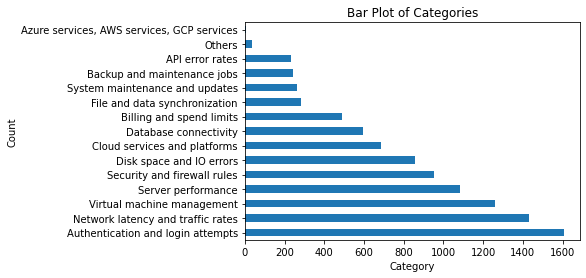

In [43]:
import matplotlib.pyplot as plt
# Plotting the bar plot
category_counts = df['category'].value_counts()
category_counts.plot(kind='barh')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot of Categories')
plt.show()
